In [1]:
import numpy as np

import pandas as pd

import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Activation, Dropout

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from matplotlib import pyplot as plt

import itertools

Using TensorFlow backend.
/home/pedro/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/pedro/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/pedro/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/pedro/.local/lib/python3.6/site-packages/tensorflow/python/fra

In [2]:
def plotConfusionMatrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.bewaxis]
    thresh = cm.max()/2
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predict label')

In [3]:
samples = np.load("data/olivetti_faces.npy")
labels = np.load("data/olivetti_faces_target.npy")


In [4]:
img_rows, img_cols = 64, 64

if backend.image_data_format() == 'channels_first':
    samples = samples.reshape(samples.shape[0],1,img_rows, img_cols)
    input_shape=(1,img_rows, img_cols)
else:
    samples = samples.reshape(samples.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
labels = keras.utils.to_categorical(labels, 40)

xTrain, xTest, yTrain, yTest = train_test_split(samples, labels, test_size=0.2)


In [5]:
model = Sequential()

In [6]:
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(40, activation='softmax'))

In [7]:
model.summary()
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 40)                501800    
Total params: 539,368
Trainable params: 539,368
Non-trainable params: 0
________________________________________________

In [8]:
history = model.fit(xTrain, yTrain, batch_size=32, epochs=100, validation_data=(xTest, yTest))


Train on 320 samples, validate on 80 samples
Epoch 1/100
320/320 [==============================] - 1s 4ms/step - loss: 3.7155 - accuracy: 0.0281 - val_loss: 3.6882 - val_accuracy: 0.0000e+00
Epoch 2/100
320/320 [==============================] - 1s 4ms/step - loss: 3.6697 - accuracy: 0.0812 - val_loss: 3.7142 - val_accuracy: 0.0250
Epoch 3/100
320/320 [==============================] - 1s 4ms/step - loss: 3.6147 - accuracy: 0.0656 - val_loss: 3.7382 - val_accuracy: 0.0125
Epoch 4/100
320/320 [==============================] - 1s 4ms/step - loss: 3.4900 - accuracy: 0.1375 - val_loss: 3.5635 - val_accuracy: 0.1250
Epoch 5/100
320/320 [==============================] - 1s 4ms/step - loss: 3.1926 - accuracy: 0.4313 - val_loss: 3.1348 - val_accuracy: 0.4125
Epoch 6/100
320/320 [==============================] - 2s 5ms/step - loss: 2.5865 - accuracy: 0.7000 - val_loss: 2.2768 - val_accuracy: 0.6125
Epoch 7/100
320/320 [==============================] - 1s 4ms/step - loss: 1.5730 - accuracy

320/320 [==============================] - 1s 4ms/step - loss: 1.9928e-04 - accuracy: 1.0000 - val_loss: 0.1204 - val_accuracy: 0.9625
Epoch 56/100
320/320 [==============================] - 1s 4ms/step - loss: 1.8968e-04 - accuracy: 1.0000 - val_loss: 0.1165 - val_accuracy: 0.9625
Epoch 57/100
320/320 [==============================] - 1s 4ms/step - loss: 1.7795e-04 - accuracy: 1.0000 - val_loss: 0.1174 - val_accuracy: 0.9625
Epoch 58/100
320/320 [==============================] - 1s 4ms/step - loss: 1.6889e-04 - accuracy: 1.0000 - val_loss: 0.1190 - val_accuracy: 0.9625
Epoch 59/100
320/320 [==============================] - 1s 4ms/step - loss: 1.6015e-04 - accuracy: 1.0000 - val_loss: 0.1167 - val_accuracy: 0.9625
Epoch 60/100
320/320 [==============================] - 1s 4ms/step - loss: 1.5157e-04 - accuracy: 1.0000 - val_loss: 0.1206 - val_accuracy: 0.9625
Epoch 61/100
320/320 [==============================] - 1s 4ms/step - loss: 1.4504e-04 - accuracy: 1.0000 - val_loss: 0.1214 

400/400 [==============================] - 0s 933us/step


/home/pedro/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/pedro/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/pedro/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/pedro/.local/lib/python3.6/site-packages/pandas

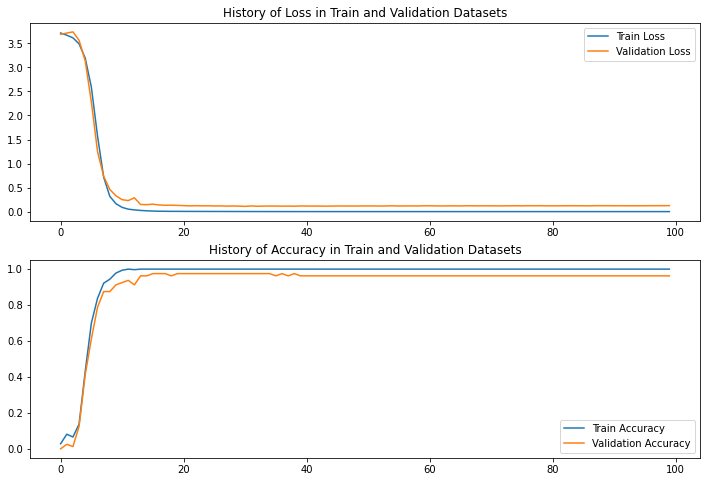

In [9]:
accuracy = model.evaluate(samples, labels)
mhistory = pd.DataFrame()
mhistory['Train Loss'] = history.history['loss']
mhistory['Validation Loss'] = history.history['val_loss']
mhistory['Train Accuracy'] = history.history['accuracy']
mhistory['Validation Accuracy'] = history.history['val_accuracy']

fig, axarr = plt.subplots(nrows=2, ncols=1, figsize=(12,8))
axarr[0].set_title("History of Loss in Train and Validation Datasets")
mhistory[["Train Loss", "Validation Loss"]].plot(ax=axarr[0])
axarr[1].set_title("History of Accuracy in Train and Validation Datasets")
mhistory[["Train Accuracy", "Validation Accuracy"]].plot(ax=axarr[1])
plt.show()

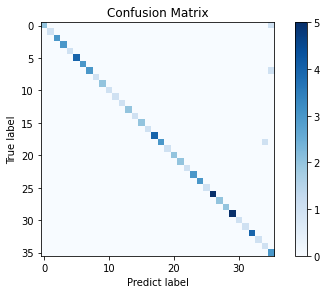

In [10]:
testLables = [str(i) for i in range(0, 40)]
predictions = model.predict(xTrain, batch_size=10, verbose=0)
rPredictions = model.predict_classes(xTest, batch_size=10, verbose=0)
rLabels = np.argmax(yTest, axis=1)
confusionMatrix = confusion_matrix(rLabels, rPredictions)
plotConfusionMatrix(confusionMatrix, testLables)

In [11]:
score = model.evaluate(xTest, yTest, verbose=0)

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Test loss:  0.12419429114088416
Test accuracy:  0.9624999761581421


In [12]:
model = Sequential()

In [13]:
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(40, activation='softmax'))

In [14]:
model.summary()
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)            

In [15]:
history = model.fit(xTrain, yTrain, batch_size=32, epochs=100, validation_data=(xTest, yTest))

Train on 320 samples, validate on 80 samples
Epoch 1/100
320/320 [==============================] - 2s 5ms/step - loss: 3.7925 - accuracy: 0.0125 - val_loss: 3.6904 - val_accuracy: 0.0125
Epoch 2/100
320/320 [==============================] - 2s 5ms/step - loss: 3.6809 - accuracy: 0.0375 - val_loss: 3.6909 - val_accuracy: 0.0000e+00
Epoch 3/100
320/320 [==============================] - 2s 5ms/step - loss: 3.6848 - accuracy: 0.0469 - val_loss: 3.7353 - val_accuracy: 0.0000e+00
Epoch 4/100
320/320 [==============================] - 2s 5ms/step - loss: 3.6624 - accuracy: 0.0281 - val_loss: 3.7088 - val_accuracy: 0.0000e+00
Epoch 5/100
320/320 [==============================] - 2s 5ms/step - loss: 3.6465 - accuracy: 0.0469 - val_loss: 3.7122 - val_accuracy: 0.0125
Epoch 6/100
320/320 [==============================] - 1s 5ms/step - loss: 3.5960 - accuracy: 0.1063 - val_loss: 3.7086 - val_accuracy: 0.0375
Epoch 7/100
320/320 [==============================] - 2s 5ms/step - loss: 3.5421 - a

320/320 [==============================] - 2s 5ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0922 - val_accuracy: 0.9625
Epoch 58/100
320/320 [==============================] - 2s 7ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0851 - val_accuracy: 0.9625
Epoch 59/100
320/320 [==============================] - 2s 7ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0694 - val_accuracy: 0.9750
Epoch 60/100
320/320 [==============================] - 2s 6ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0719 - val_accuracy: 0.9750
Epoch 61/100
320/320 [==============================] - 2s 6ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0736 - val_accuracy: 0.9750
Epoch 62/100
320/320 [==============================] - 2s 6ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0719 - val_accuracy: 0.9750
Epoch 63/100
320/320 [==============================] - 2s 7ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0722 - val_accuracy: 0.9750
Epoch

400/400 [==============================] - 1s 2ms/step


/home/pedro/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/pedro/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/pedro/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/pedro/.local/lib/python3.6/site-packages/pandas

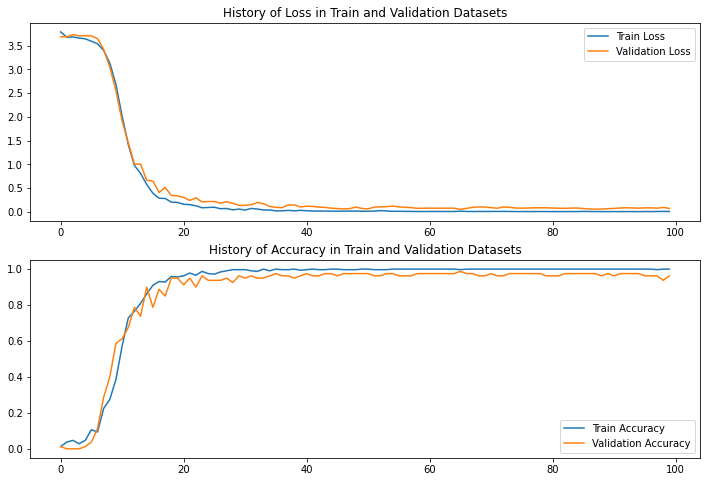

In [16]:
accuracy = model.evaluate(samples, labels)
mhistory = pd.DataFrame()
mhistory['Train Loss'] = history.history['loss']
mhistory['Validation Loss'] = history.history['val_loss']
mhistory['Train Accuracy'] = history.history['accuracy']
mhistory['Validation Accuracy'] = history.history['val_accuracy']

fig, axarr = plt.subplots(nrows=2, ncols=1, figsize=(12,8))
axarr[0].set_title("History of Loss in Train and Validation Datasets")
mhistory[["Train Loss", "Validation Loss"]].plot(ax=axarr[0])
axarr[1].set_title("History of Accuracy in Train and Validation Datasets")
mhistory[["Train Accuracy", "Validation Accuracy"]].plot(ax=axarr[1])
plt.show()

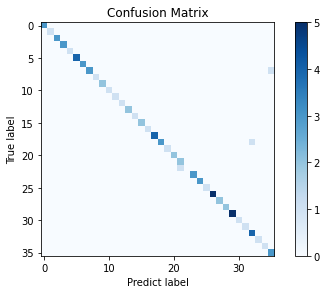

In [17]:
testLables = [str(i) for i in range(0, 40)]
predictions = model.predict(xTrain, batch_size=10, verbose=0)
rPredictions = model.predict_classes(xTest, batch_size=10, verbose=0)
rLabels = np.argmax(yTest, axis=1)
confusionMatrix = confusion_matrix(rLabels, rPredictions)
plotConfusionMatrix(confusionMatrix, testLables)

In [18]:
score = model.evaluate(xTest, yTest, verbose=0)

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Test loss:  0.06833475530147552
Test accuracy:  0.9624999761581421


In [19]:
model = Sequential()

In [20]:
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(40,  activation='softmax'))

In [21]:
model.summary()
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 64)       

In [22]:
history = model.fit(xTrain, yTrain, batch_size=32, epochs=100, validation_data=(xTest, yTest))

Train on 320 samples, validate on 80 samples
Epoch 1/100
320/320 [==============================] - 4s 13ms/step - loss: 3.7443 - accuracy: 0.0188 - val_loss: 3.6911 - val_accuracy: 0.0125
Epoch 2/100
320/320 [==============================] - 4s 14ms/step - loss: 3.6858 - accuracy: 0.0219 - val_loss: 3.6925 - val_accuracy: 0.0000e+00
Epoch 3/100
320/320 [==============================] - 4s 11ms/step - loss: 3.6784 - accuracy: 0.0375 - val_loss: 3.6995 - val_accuracy: 0.0125
Epoch 4/100
320/320 [==============================] - 5s 15ms/step - loss: 3.6716 - accuracy: 0.0344 - val_loss: 3.7090 - val_accuracy: 0.0000e+00
Epoch 5/100
320/320 [==============================] - 5s 14ms/step - loss: 3.6811 - accuracy: 0.0406 - val_loss: 3.7058 - val_accuracy: 0.0125
Epoch 6/100
320/320 [==============================] - 4s 14ms/step - loss: 3.6616 - accuracy: 0.0344 - val_loss: 3.7005 - val_accuracy: 0.0000e+00
Epoch 7/100
320/320 [==============================] - 4s 11ms/step - loss: 3.6

320/320 [==============================] - 4s 14ms/step - loss: 0.1184 - accuracy: 0.9594 - val_loss: 0.1653 - val_accuracy: 0.9500
Epoch 58/100
320/320 [==============================] - 5s 15ms/step - loss: 0.1534 - accuracy: 0.9688 - val_loss: 0.3480 - val_accuracy: 0.8625
Epoch 59/100
320/320 [==============================] - 4s 12ms/step - loss: 0.0485 - accuracy: 0.9812 - val_loss: 0.2417 - val_accuracy: 0.9375
Epoch 60/100
320/320 [==============================] - 5s 15ms/step - loss: 0.0407 - accuracy: 0.9875 - val_loss: 0.1793 - val_accuracy: 0.9500
Epoch 61/100
320/320 [==============================] - 6s 17ms/step - loss: 0.0446 - accuracy: 0.9812 - val_loss: 0.1821 - val_accuracy: 0.9500
Epoch 62/100
320/320 [==============================] - 5s 17ms/step - loss: 0.0462 - accuracy: 0.9875 - val_loss: 0.1432 - val_accuracy: 0.9375
Epoch 63/100
320/320 [==============================] - 5s 15ms/step - loss: 0.0250 - accuracy: 0.9937 - val_loss: 0.1153 - val_accuracy: 0.962

400/400 [==============================] - 1s 3ms/step


/home/pedro/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/pedro/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/pedro/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/pedro/.local/lib/python3.6/site-packages/pandas

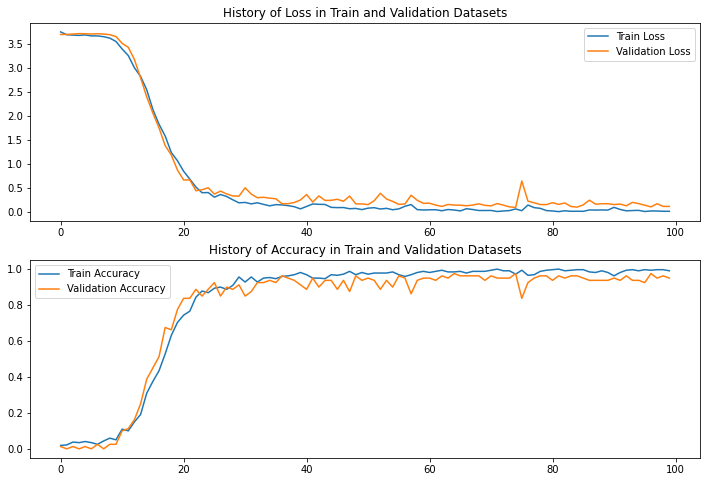

In [23]:
accuracy = model.evaluate(samples, labels)
mhistory = pd.DataFrame()
mhistory['Train Loss'] = history.history['loss']
mhistory['Validation Loss'] = history.history['val_loss']
mhistory['Train Accuracy'] = history.history['accuracy']
mhistory['Validation Accuracy'] = history.history['val_accuracy']

fig, axarr = plt.subplots(nrows=2, ncols=1, figsize=(12,8))
axarr[0].set_title("History of Loss in Train and Validation Datasets")
mhistory[["Train Loss", "Validation Loss"]].plot(ax=axarr[0])
axarr[1].set_title("History of Accuracy in Train and Validation Datasets")
mhistory[["Train Accuracy", "Validation Accuracy"]].plot(ax=axarr[1])
plt.show()

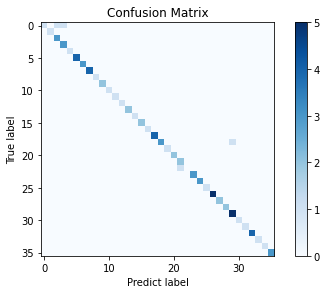

In [24]:
testLables = [str(i) for i in range(0, 40)]
predictions = model.predict(xTrain, batch_size=10, verbose=0)
rPredictions = model.predict_classes(xTest, batch_size=10, verbose=0)
rLabels = np.argmax(yTest, axis=1)
confusionMatrix = confusion_matrix(rLabels, rPredictions)
plotConfusionMatrix(confusionMatrix, testLables)

In [25]:
score = model.evaluate(xTest, yTest, verbose=0)

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Test loss:  0.11501560509204864
Test accuracy:  0.949999988079071
